In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/teutsch-35/Teutsch.fit
/kaggle/input/ps-isochrone/output420436036148.dat.txt
/kaggle/input/gulliver44/ocdata_sth.r126.2.r128.2.d-39.1.d-37.1.fits
/kaggle/input/gulliver-new-members/result (3).csv
/kaggle/input/ps-isochrone2/output667587140183.dat.txt
/kaggle/input/gulliver44-mem/Gulliver_44_members.csv
/kaggle/input/teutsch-35-ud/asu (1).fit


In [2]:
import pandas as pd
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

dat = Table.read('/kaggle/input/gulliver44/ocdata_sth.r126.2.r128.2.d-39.1.d-37.1.fits', format='fits')
df_44_0 = dat.to_pandas()
dat_2 = Table.read('/kaggle/input/teutsch-35/Teutsch.fit', format='fits')
df_35 = dat_2.to_pandas()
dat_3 = Table.read('/kaggle/input/teutsch-35-ud/asu (1).fit', format='fits')
df_35_1 = dat_3.to_pandas()
df_44 = pd.read_csv("/kaggle/input/gulliver44-mem/Gulliver_44_members.csv")
df_44_mem = pd.read_csv("/kaggle/input/gulliver-new-members/result (3).csv")

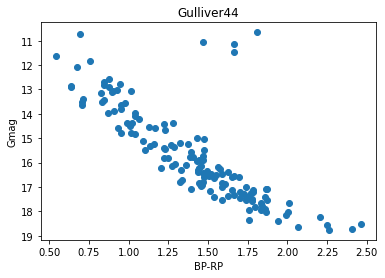

In [3]:
x = df_44['BPmag'] - df_44['RPmag']
y = df_44['Gmag']

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.invert_yaxis()
ax.set_xlabel("BP-RP")
ax.set_ylabel("Gmag")
ax.set_title('Gulliver44')

plt.show()

In [4]:
# Finding Corresponding Member in Gulliver44 PS Data  #
# new_df = pd.DataFrame(df_44.iloc[:, [1, 2]])
# def find_corresponding_member(row):
#     members_RA = new_df['RA']
#     members_Dec = new_df['DEC']
#     row_RA = row['ra']
#     row_Dec = row['dec']
#     for member_RA, member_Dec in zip(members_RA, members_Dec):
#         distance = np.sqrt(((member_RA - row_RA)**2) + ((member_Dec - row_Dec)**2))
#         if distance <= 0.000277778:
#             new_df.drop(new_df[new_df['RA'] == member_RA].index)
#             new_df.drop(new_df[new_df['DEC'] == member_Dec].index)
#             return True
#     return False

# df_44_0['is_member'] = df_44_0.apply(find_corresponding_member, axis=1)
# result_df = df_44_0[df_44_0['is_member'] == True]
# result_df.to_csv("result.csv", index=False)

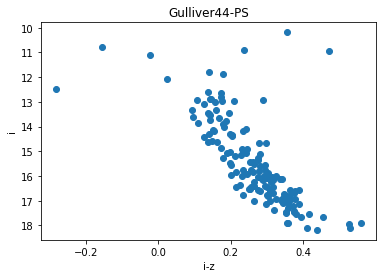

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df_44_mem['i_ave_sth'] - df_44_mem['z_ave_sth']
y = df_44_mem['i_ave_sth']

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.invert_yaxis()
ax.set_xlabel("i-z")
ax.set_ylabel("i")
ax.set_title('Gulliver44-PS')

plt.show()

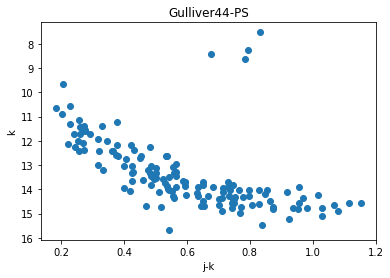

In [6]:
x = df_44_mem['j_ave'] - df_44_mem['k_ave']
y = df_44_mem['k_ave']

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.invert_yaxis()
ax.set_xlabel("j-k")
ax.set_ylabel("k")
ax.set_title('Gulliver44-PS')

plt.show()

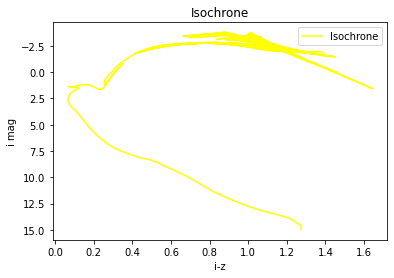

In [7]:
iso_data = np.loadtxt("/kaggle/input/ps-isochrone2/output667587140183.dat.txt")

i = iso_data[:, 30]
z = iso_data[:, 31]
i = i[:-1]
z = z[:-1]

i_z = i - z
plt.plot(i_z, i, c='yellow', label='Isochrone')
# plt.ylim(9.5, 18.5)
plt.gca().invert_yaxis()
plt.xlabel('i-z')
plt.ylabel('i mag')
plt.title('Isochrone')
plt.legend()
plt.show()